In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
home_prices = pd.read_csv('home_prices.csv')
home_prices

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


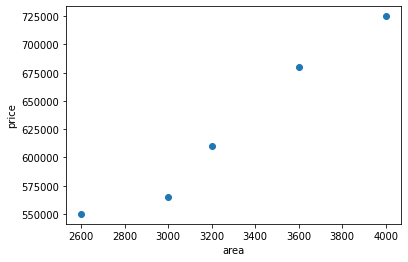

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(home_prices.area,home_prices.price)


In [6]:
new_df = home_prices.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
prices = home_prices.price
prices

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

## fitting linear model to our data

In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(new_df.values,prices)

LinearRegression()

## predict price of home with area = 3300 sqr ft

In [12]:
reg.predict([[3300]])

array([628715.75342466])

In [13]:
reg.predict([[5500]])

array([927448.63013699])

# generate csv file to predicted data

In [14]:
areas = pd.read_csv('area.csv')
areas.head(3)

,area
0,1000
1,1500
2,2300


In [16]:
pred = reg.predict(areas.values)
pred

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [17]:
areas['price'] = pred
areas


,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
areas.to_csv('predict.csv')